In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random


# Funciones Auxiliares


In [12]:
def igual_varianza(l1,l2):
    estadistico = np.var(l1) / np.var(l2) 
    pval=  sp.stats.f.cdf(estadistico,len(l1)-1, len(l2)-1)
    #print("pval = " + str(pval))
    return pval>=0.05

def distribucion_normal(l1):
    return sp.stats.shapiro(l1)[1] >=0.05

def test_permutaciones(l1,l2,cant_permutaciones):
    
    meanl1 = np.mean(l1)
    meanl2 = np.mean(l2)
    l1 = [x for x in l1]
    l2 = [x for x in l2]
    muestra = l1+l2
    il1 = len(l1)-1
    delta=[] 
    delta.append(meanl2-meanl1)

    for i in range(0,cant_permutaciones):

        random.shuffle(muestra)
        currentDelta = np.mean(muestra[:il1+1]) - np.mean(muestra[il1+1:])
        delta.append(currentDelta)

    aux = 1
    for i in range(1,len(delta)):
        if delta[0] <= delta[i]:
            aux += 1
    pval = aux/len(delta)
    
    plt.axvline(x=delta[0], color='r')
    plt.hist(delta)
    plt.show()
    print("p value = " + str(pval)) 

    
def igual_media_apareada(l1,l2,cant_permut): 
    if distribucion_normal(l1) and distribucion_normal(l2):
        print("checkeo distribución normal: ok")
        ig_var = igual_varianza(l1,l2)
        ig_var2 = igual_varianza(l2,l1)
        if (ig_var and ig_var2):            
            print("checkeo varianza: ok")
            print("utilizamos test de Student, dos colas")
            pval = sp.stats.ttest_rel(l1, l2)[1]
            print("p value = " + str(pval) )
        else:
            print("checkeo varianza: NO")
            print("utilizamos test de Welsh, dos colas")
            pval = sp.stats.ttest_ind(l1, l2)[1]
            print("p value = " + str(pval) )
    else:
        print("checkeo distribución normal: NO")
        print("utilizamos test de permutaciones")
        test_permutaciones(l1,l2,cant_permut)
            
def igual_media_1muesrta(l):
    if distribucion_normal(l):
        print("checkeo distribución normal: ok") 
        meanl = np.mean(l)
        pval = sp.stats.ttest_1samp(l,meanl)[1]
        print("p value = " + str(pval) )
    
def  whitney_apareadas(l1,l2):
    pval= sp.stats.wilcoxon(l1,l2)[1]
    print("p value = " + str(pval))
    
def anova2ways():
    df=DataFrame()
    df.read_tbl('tiempos.txt')
    df['id'] = xrange(len(df['len']))
 
    print(df.anova('len', sub='id', bfactors=['supp', 'dose']))

#divide por tres por que quiero el promedio, es una funcion muy especifica usarla con quidado
def sumLista(l1, l2):
    l3 =[]
    for i in range(len(l1)):
        l3.append((l1[i] +l2[i])/3.0)
    
    return l3
    



# Lectura de datos

In [13]:
df = pd.read_csv('tiempos.txt', sep=' ')

# Gráficos Preliminares

/home/javier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


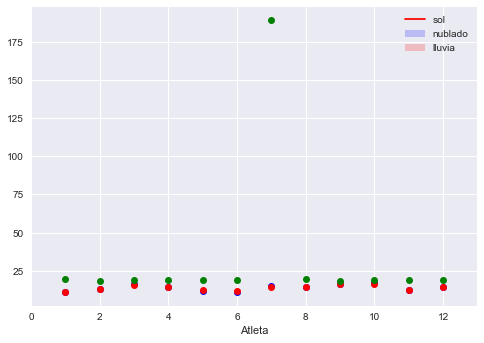

In [14]:
sol = sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")

nublado = sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")

lluvia = sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")

sns.plt.legend([sol, nublado, lluvia], labels=["sol","nublado","lluvia"])

sns.plt.show()



podemos observar que un dato tiene un valor "extraño", tiene un valor mucho mayor a los demas. 
Suponemos que se debe a un error de tipeo. 


# Limpieza
Tomamos la decisión de borrar la fila.

/home/javier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


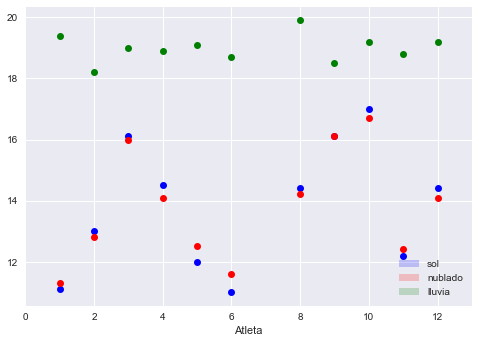

In [15]:
df.drop(df[df.tiempo_lluvia > 180.0].index, inplace=True)

sol = sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")

nublado = sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")

lluvia = sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")

sns.plt.legend([sol, nublado, lluvia], labels=["sol","nublado","lluvia"])

sns.plt.show()


Consideramos que los test de mayor utlidad seran los que analizan muestras apareadas, ya que de esta forma podremos comparar las velocidades en dos tipos de clima. Esperamos utilizar principalmente el test de student, en caso de ser necesario el test de Welsh. 

# Analisis de Datos 

# Hipótesis: el clima influye en la velocidad del atleta.


Hipotesis Nula: el clima no influye en la velocidad del atleta.
Usaremos el set de datos de tiempos para el clima de lluvia,sol y nublado.
Utilizaremos tests de muestras apareadas para poder comparar entre dos tipos de clima. 
Iremos chequeando que hipótesis requeridas por los tests se cumplen, y a raíz de esto corrermeos el test correspondiente. 
Recordemos que el test de Student asume tres hipotesis:
1-Muestras independientes
2-Variables distribuidas normalmente
3-Igual varianza
Asumimos que nuestras muestras son independientes ya que no encontramos razón para sospechar que la velocidad de un corredor podría verse afectada por la velocidad de otro.
Empezaremos utilizando el test de Student siempre y cuando se cumplas las hispotesis, En caso de no cumplir la hipotesis de igual varianza utilizaremos el test de Welsh y en caso de no cumplir tampoco la distribución normal, utilizaremos el test no parametrico de permutaciones.

In [16]:
igual_media_apareada(df['tiempo_sol'], df['tiempo_lluvia'],1000)

checkeo distribución normal: ok
checkeo varianza: NO
utilizamos test de Welsh, dos colas
p value = 1.04961025807e-07


In [17]:
igual_media_apareada(df['tiempo_sol'], df['tiempo_nublado'],1000)

checkeo distribución normal: ok
checkeo varianza: ok
utilizamos test de Student, dos colas
p value = 1.0


In [18]:
igual_media_apareada(df['tiempo_nublado'], df['tiempo_lluvia'],1000)

checkeo distribución normal: ok
checkeo varianza: NO
utilizamos test de Welsh, dos colas
p value = 1.851080344e-08


# Hipótesis: Los atletas son más lentos en días de lluvias que en días soleados.

Para esto utilizaremos el Test de Permutaciones.
Nuestra hipotesis nula es: Los atelatas no son más lentos en días de lluvia que en días soleados.
Equivalentemente decimos que los atletas son igualmente rapidos o más rápidos en días lluviosos que en días soleados.

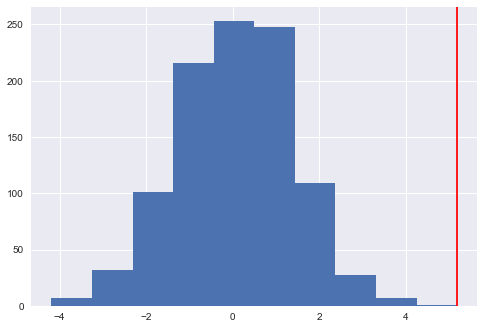

p value = 0.000999000999000999


In [19]:
#igual_media_apareada(df['tiempo_sol'], df['tiempo_lluvia'],1000)
 

test_permutaciones(df['tiempo_sol'],df['tiempo_lluvia'],1000)




Este resultado nos dice que hay una probabilidad igual a p de obtener un 
resultado a travez de una medición que cumpla la hipotesis nula. Como p es
un valor muy pequeño, podemos decir que es poco probable, fortaleciendo 
nuestra hipotesis original.


# Hipótesis: El cielo nublado no influye en los tiempos de los atletas

Hipotesś nula: el cielo nublado influye en los tiempos de los atletas

In [20]:
igual_media_apareada(df['tiempo_sol'], df['tiempo_nublado'],1000)

checkeo distribución normal: ok
checkeo varianza: ok
utilizamos test de Student, dos colas
p value = 1.0


p value = 0.959221134457


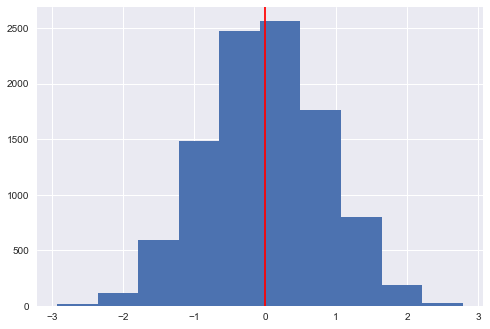

p value = 0.49905009499050096


In [21]:
#Nuestro p valor alto nos indica que no podemos rechazar la hipotesis nula.whitney_apareadas(l1,l2)

whitney_apareadas(df['tiempo_nublado'], df['tiempo_sol'])
test_permutaciones(df['tiempo_nublado'], df['tiempo_sol'],10000)
# aca corri otros tests para ver q onda el  q masomenos da q si es el de permutaciones 
#pero si ponemos esto estaria bueno decir q igual rechazamos xq es el unico y ademas no dio taaan bajo.. ni idea
#hay un problema con el test de permutaciones, esto tendria que da por la mitad

# Hipótesis: la velocidad en días de lluvia es independiente del atleta

hipotesis nula: la velocidad en días de lluvia depende del atleta.

Para testear nuestra hipotesis nula vamos a crear un test de permutaciones con una nueva variable aleatoria, esta se define como el promedio en tiempos de un atleta, es decir vamos a sumar los tiempos de cada atleta en los distintos climas y sacar su promedio.Esta va a ser nuestra nueva variable aleatoria.
Luego vamos a permutar las velocidades en dias de lluvia y volveremos a caluclar el promedio.
si nos da un p valor muy bajo entonces la descartaremos, respaldando nuestra hipotesis nula. 



/home/javier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


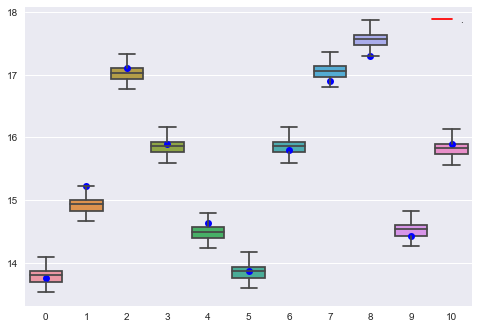

In [25]:
#suma elemento a elemento
df['tiempo_sol+nublado'] = df['tiempo_sol'] + df['tiempo_nublado']

#paso a lista
tiempo_sol_nublado = [x for x in df['tiempo_sol+nublado']]
tiempo_lluvia = [x for x in df['tiempo_lluvia']]
#promedio x atleta
tiempo_prom = sumLista(tiempo_sol_nublado, tiempo_lluvia)

#print(tiempo_sol_nublado)
#print(tiempo_lluvia)
#print(tiempo_prom)
#hay un delta x atleta
delta =[]
delta.append(tiempo_prom)
#permuto
for i in range(15000):
    random.shuffle(tiempo_lluvia)
    tiempo_prom = sumLista(tiempo_sol_nublado, tiempo_lluvia)
    delta.append(tiempo_prom)

dataset = pd.DataFrame(data=delta)
#print(dataset)
#print(delta)

tprom = sns.tsplot( tiempo_prom, interpolate=False, color="blue")
sns.plt.legend([tiempo_prom], labels=["."])
sns.boxplot( data=dataset)
plt.show()



Este gráfico es un boxPlot de los datos obtenidos tras el proceso de permutar, ademas esta superpuesto en puntos azules el promedio original de los atletas. Podemos observar que el promedio original se encuentro dentro del rango del box.
#en realidad hay q juntarlos posta y ver mas q onda

Al correr este histograma, nos sorprendio la falta de información, al ver delta, el arreglo con los valores a graficar,  entendimos que es por que los valores varian muy poco. 

11


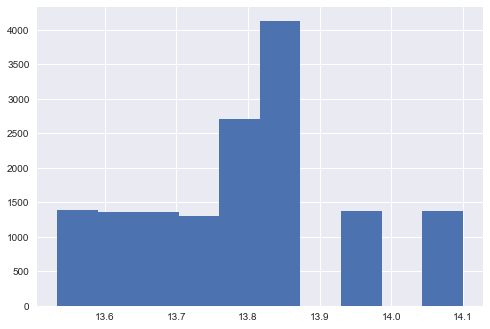

p value = 0.1835210985934271


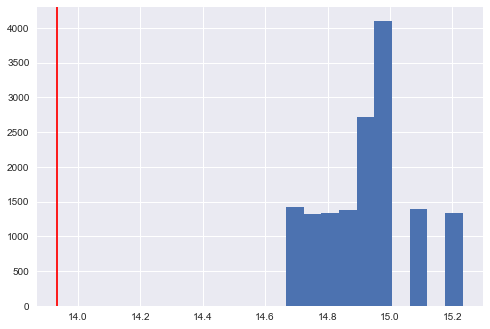

p value = 0.9999333377774815


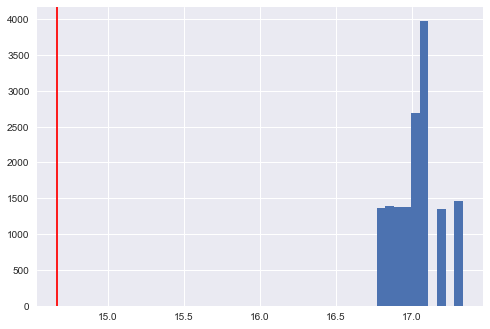

p value = 0.540230651289914


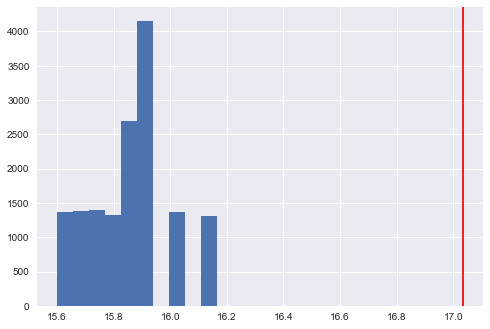

p value = 0.6353576428238118


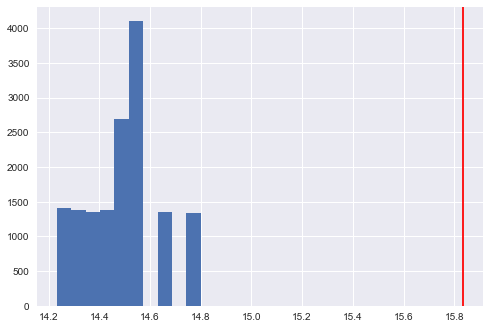

p value = 0.45270315312312515


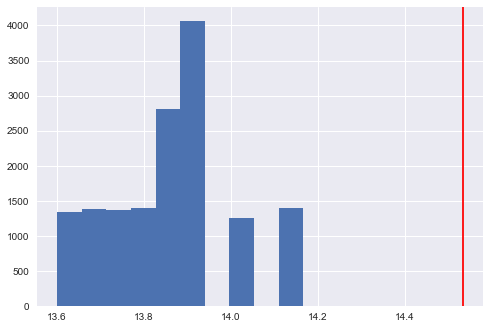

p value = 0.8186120925271648


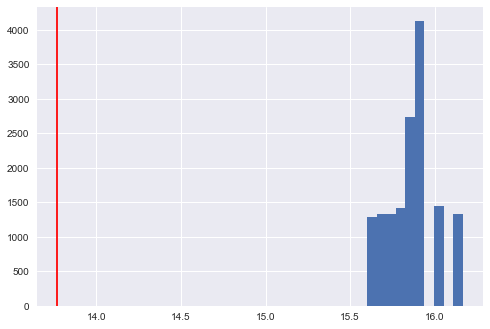

p value = 0.08859409372708486


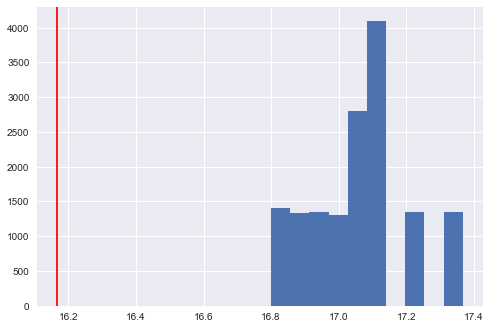

p value = 0.9058729418038798


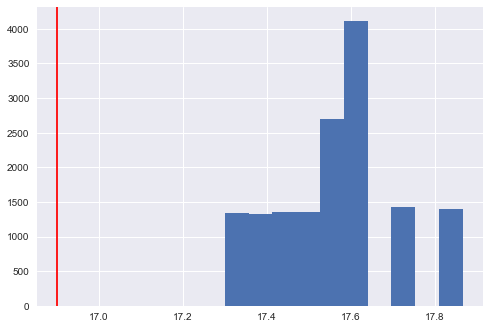

p value = 0.3672421838544097


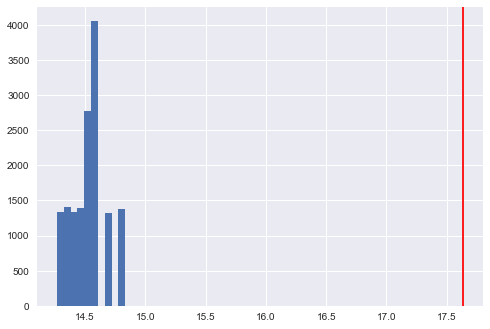

p value = 0.727884807679488


In [26]:

    
lendelta = len(delta)-1    
print(len(delta[1]))
for i in range(0,10):    
    aux = []
    acum=0
    for j in range(0,lendelta):
        intaux = delta[j][i]
        aux.append(intaux) 
        if delta[0][i] <= intaux:
            acum += 1
    pval=acum/len(delta)   
    plt.hist(aux)
    plt.show()    
    plt.axvline(x=delta[0][i], color='r')
    print("p value = " + str(pval))

#print(delta[:50])

como ven la diferencia es muy poca, y se observa recien en el treceavo digito decimal. Aunque tenemos el p valor que " "
decidimos estandarizar los datos, para conseguir un grafico que represente la distribución del promedio de velocidades, 
permutando la velocidad de los atletas en los días de lluvia.

In [24]:
#quiero estandarizar los datos por que me dio un numero con una diferencia muy chica.
mean = np.mean(delta)
desvio = np.std(delta)
delta_estandarizada = []
for i in range(len(delta)):
    delta_estandarizada.append((delta[i] - mean)/ desvio)
#print(delta_estandarizada)
plt.axvline(x=delta_estandarizada[0], color='r')
plt.hist(delta_estandarizada, bins = 10)
plt.show()

distintos = []
for i in delta_estandarizada:
    if not(i in distintos):
        distintos.append(i)
        
print(distintos)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# propongo realizar un t-test de muestra unica (aunq no sabria contra q valor testear) 
igual_media_1muesrta(df['tiempo_lluvia'])
#aca lo estoy haciendo usando el promedio de los tiempos...

 # Hipótesis: El cielo nublado no influye en los tiempos de los atletas

## Consideraciones:

In [ ]:
1. Para analizar esta hipótesis se tomó como día standard el día soleado. 
Con lo cual vamos a analizar las velocidades de los atletas en los días nublados
contra las mismas en los días soleados.

## Tests:

### Anova:

#### Hipótesis:

1. Las muestras son independientes: Esto lo asumimos (porque no sabemos exactamente cómo se tomaron las muestras) pero podemos afirmar que es cierto dado que la corrida de una persona no afecta la corrida de otra persona (a menos que esto se busque a propósito).

2. Las muestras de cada día siguen una distribución normal. Dado que el p valor obtenido con un test de Shapiro-Wilks sobre los días soleados y los días nublados es menor a 0.05, podemos afirmar que las muestras cumplen con esta hipótesis.

3. The population standard deviations of the groups are all equal. f-test


    
    

In [ ]:
df=DataFrame()
dataSol = [x for x in df['tiempo_sol']]
dataLluvia = [x for x in df['tiempo_lluvia']]
df['data'] = data1 + data2
df['conditions'] = ['Sol']*len(dataSol)+['Lluvia']*len(dataLluvia)
aov_pyvttbl = df.anova1way('weight', 'group')
print (aov_pyvttbl)